In [1]:
train_path = 'data/train(1).csv'
test_path = 'data/test(1).csv'

In [2]:
import pandas as pd
train_df = pd.read_csv(train_path)

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# def clean_data(data_set):
#     data_set.drop('Alley','PoolQC','MiscFeature')
# clean_train_df = train_df.drop(['Alley','PoolQC','MiscFeature'])
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [6]:
train_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [7]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,8))
#密度图查看分类信息
sns.kdeplot(train_df.loc[train_df['Alley']=='Grvl','SalePrice'],shade=True,color='g',label='Grvl')
sns.kdeplot(train_df.loc[train_df['Alley']=='Pave','SalePrice'],shade=True,color='b',label='Pave')
sns.kdeplot(train_df.loc[train_df['Alley'].isnull(),'SalePrice'],shade=True,color='k',label='None')

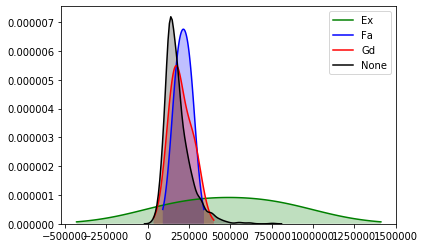

In [9]:
PoolQC_dict = {
    'Ex':'g',
    'Fa':'b',
    'Gd':'r'
}
for key,value in PoolQC_dict.items():
    sns.kdeplot(train_df.loc[train_df['PoolQC']==key,'SalePrice'],shade=True,color=value,label=key)
sns.kdeplot(train_df.loc[train_df['PoolQC'].isnull(),'SalePrice'],shade=True,color='k',label='None')

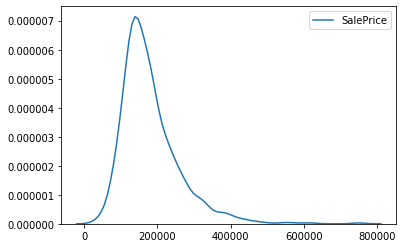

In [10]:
sns.kdeplot(train_df['SalePrice'])

In [11]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

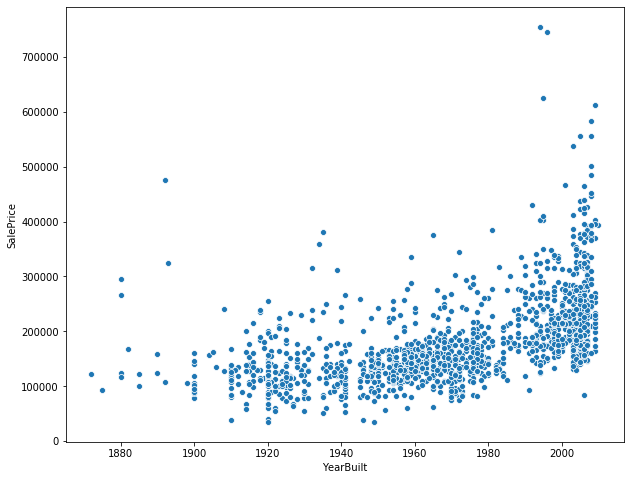

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['YearBuilt'],train_df['SalePrice'])

In [13]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

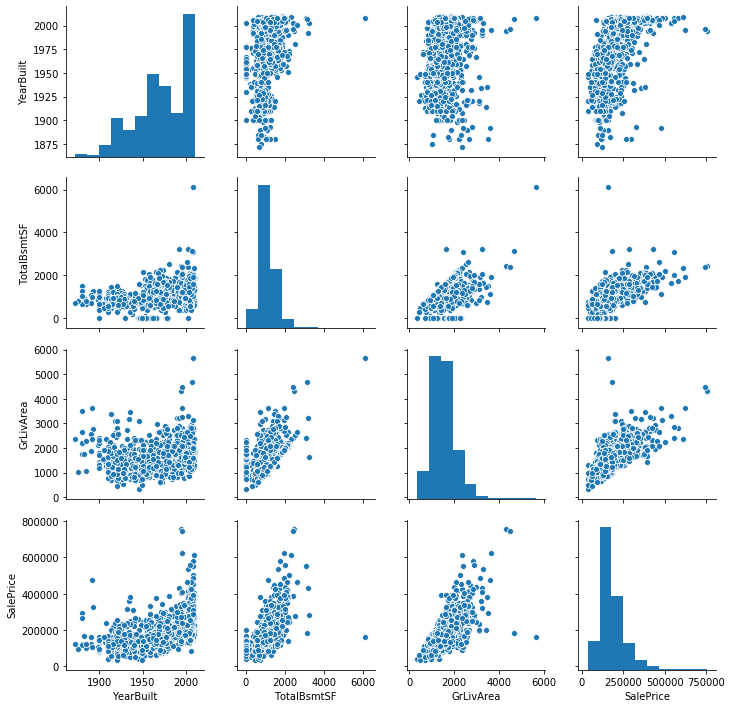

In [14]:
trains = train_df[['YearBuilt','TotalBsmtSF','GrLivArea','SalePrice']]
sns.pairplot(trains)

In [15]:
null_data = train_df.isnull().sum()
null_data = null_data[null_data>0].sort_values(ascending=False)
null_data

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [33]:
all_data = len(train_df)
# clean_df = train_df
# for col in null_data.index
#     if(null_data[col]>0.5*all_data):
#         print(col)
#         clean_df = clean_df.drop(col)
# clean_df.info()
clean_df = train_df.drop(columns = null_data[null_data>0.5*all_data].index)

In [34]:
cols = ['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
        'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual',
        'MasVnrType','Electrical']
for col in cols:
    clean_df[col].fillna('None',inplace=True)

In [35]:
cols = ['MasVnrArea']
for col in cols:
    clean_df[col].fillna(0,inplace=True)

In [36]:
clean_df['GarageYrBlt'].fillna('1970',inplace=True)
clean_df['LotFrontage'].fillna(clean_df['LotFrontage'].mean(),inplace=True)

In [38]:
def clean_data(dataset):
    drop_cols = ['PoolQC','MiscFeature','Alley','Fence']
    clean_df = dataset.drop(columns = drop_cols)
    none_cols = ['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
        'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual',
        'MasVnrType','Electrical']
    for col in none_cols:
        clean_df[col].fillna('None',inplace=True)
    clean_df['GarageYrBlt'].fillna('1970',inplace=True)
    clean_df['MasVnrArea'].fillna(0,inplace=True)
    clean_df['LotFrontage'].fillna(clean_df['LotFrontage'].mean(),inplace=True)
    return clean_df

In [39]:
clean_train_df = clean_data(train_df)

In [40]:
clean_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
